In [1]:
!pip install wandb pathling nibabel minio requests boto3

In [4]:
import wandb
import os

# Setup wandb
os.environ['WANDB_PROJECT'] = 'diabetes-vaccines-images-notebook'
os.environ['WANDB_NOTEBOOK_NAME'] = '/home/jovyan/work/test-jupyter/prepare-images.ipynb'
os.environ['WANDB_BASE_URL'] = 'http://wandb:8080'
os.environ['WANDB_API_KEY'] = 'local-f68b4b71af977015844cb5987382d102a493b0eb'
os.environ['AWS_S3_ENDPOINT_URL'] = 'http://minio:9000'
os.environ['AWS_ACCESS_KEY_ID'] = 'minio'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'minio123'

wandb.login()
wandb.init(job_type="data_convert")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Found 1 studies.
Study UID: 941a16e6-2b969e8a-d3e9e31a-1bbc74f6-abcad8c3, serie UID: abb905c8-9b7d625d-65686a07-432222a4-b419b15c
Series 'abb905c8-9b7d625d-65686a07-432222a4-b419b15c' saved as 'abb905c8-9b7d625d-65686a07-432222a4-b419b15c.nii'


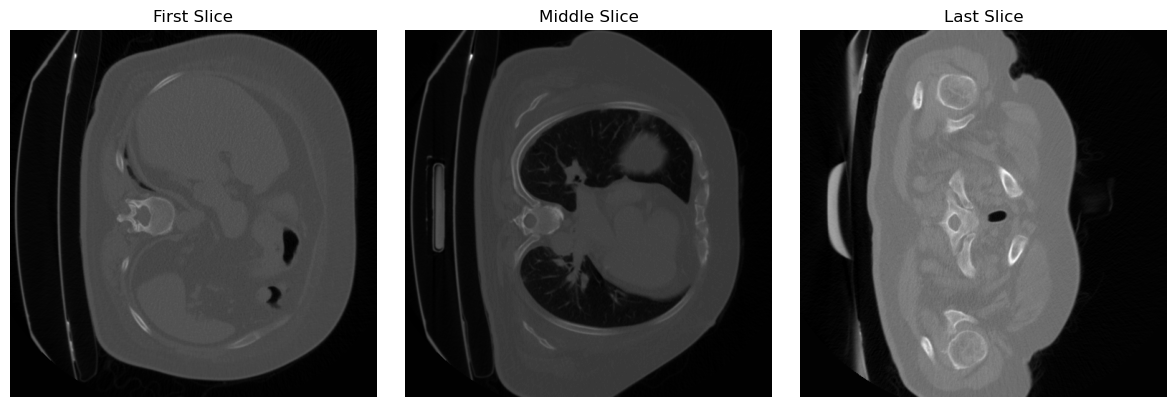

s3://coda/datasets/diabetes-vaccines-images-notebook/nii/abb905c8-9b7d625d-65686a07-432222a4-b419b15c.nii abb905c8-9b7d625d-65686a07-432222a4-b419b15c.nii


Series 'abb905c8-9b7d625d-65686a07-432222a4-b419b15c' saved to Minio/WanDB.


In [5]:
from utils import query_orthanc_api, query_series_by_name, \
  retrieve_series_nifti, display_nifti_images, save_artifact_from_file

# Setup wandb
ORTHANC_URL = 'http://host.docker.internal:8042'
PROJECT_NAME = os.environ['WANDB_PROJECT']

study_uids = query_orthanc_api(ORTHANC_URL, 'StudyID=93725')

if study_uids:
  study_count = len(study_uids)

  print(f"Found {study_count} studies.")

  for study_uid in study_uids:

    serie = query_series_by_name(ORTHANC_URL, study_uid, 'mediastinum')
    series_instance_uid = serie['ID']
    print(f"Study UID: {study_uid}, serie UID: {series_instance_uid}")

    nifti = retrieve_series_nifti(ORTHANC_URL, series_instance_uid)
    nifti_data = retrieve_series_nifti(ORTHANC_URL, series_instance_uid)
    file_path = f"{series_instance_uid}.nii"

    if nifti_data:
      file_path = f"{series_instance_uid}.nii"
      with open(file_path, "wb") as file:
        file.write(nifti_data)
      print(f"Series '{series_instance_uid}' saved as '{file_path}'")
      display_nifti_images(file_path)
      save_artifact_from_file(file_path, PROJECT_NAME, file_path)
      print(f"Series '{series_instance_uid}' saved to Minio/WanDB.")
    else:
      print("Error retrieving NIfTI data.")

else:
    print("No studies found.")